In [1]:
from __future__ import print_function
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# choose which distributions to use

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

# and which mean to give it

In [3]:
mymean = 100

In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


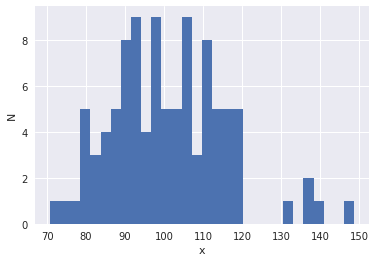

In [5]:
import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 1: Chi sq distribution: df = 100, N=100

# let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.04, standard deviation: 14.54


# Now let's do it for 100 Chisq distributions

we want distributions of different sizes (all integers between 10 and 2000)

In [7]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


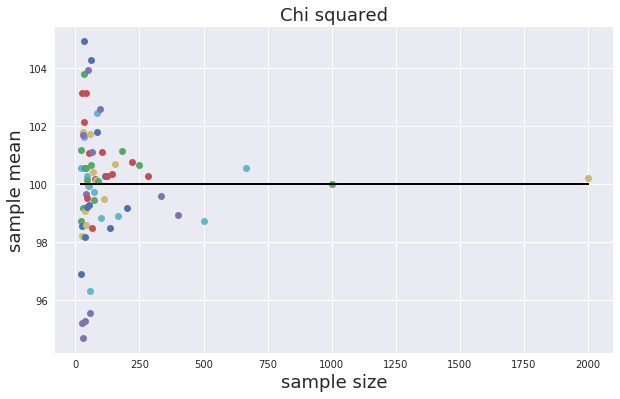

In [8]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 2: Points are scattered at first. With the incresement of sample size, the point tend to converge towards the centeral line.

# now the histogram of the mean of all samples:

# this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


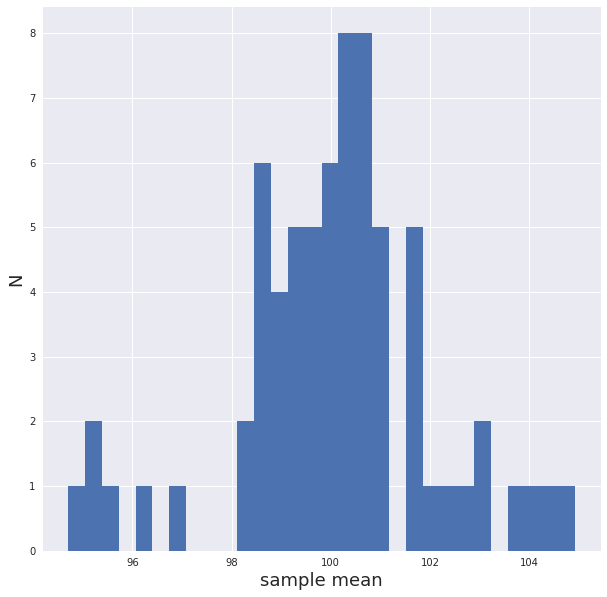

In [58]:
callmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(callmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

            Figure 3: All the sample mean of chi-square Distribution

# Do it for the Normal distribution

In [10]:
distributions = ['lnorm']

In [11]:
mymean = 100

In [12]:
# Assuming a stardard deviation as 20
scale = 20

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


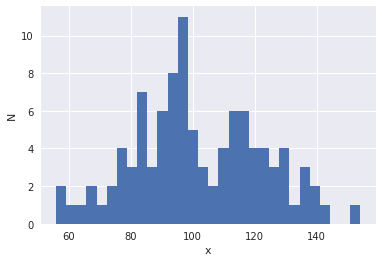

In [13]:
# import numpy as np
nd = {}
# nd is an empty disctionary,scale,size=100)
nd['lnorm'] = np.random.normal(mymean,scale, size=100)
# nd now is a dictionary with one object: an array by the key 'normal'
pl.hist(nd['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 4.  Normal distribution, mean= 100, sd= 20

In [14]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(nd['lnorm'].mean(), nd['lnorm'].std()))

Normal mean: 101.66, standard deviation: 20.76


In [15]:
mysize2 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize2, mysize2.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


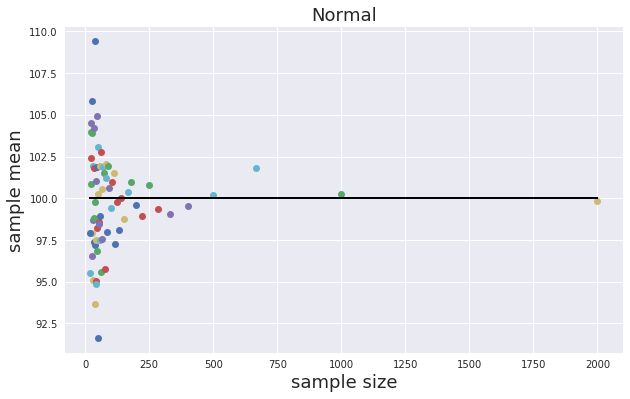

In [16]:
nd['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize2:
    nd['lnorm'][n] = np.random.normal(mymean,scale,size= n )
    
# save the means for plotting later    

nd['lnorm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in nd['lnorm']:
    if not type(nn) == str:
        nd['lnorm']['means'][nn] = nd['lnorm'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, nd['lnorm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

Figure 5. Points are scattered at first. With the incresement of sample size, the point tend to converge towards the centeral line.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


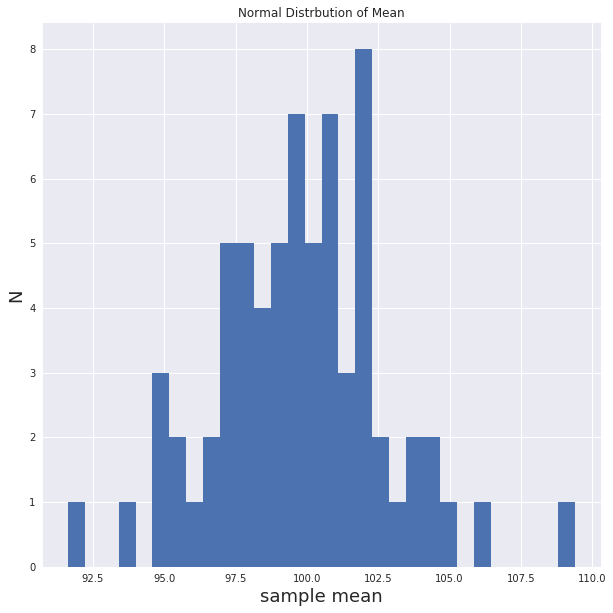

In [59]:
nallmeans = list(nd['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(nallmeans,bins=30)
pl.title('Normal Distrbution of Mean')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 6. All the sample mean of Normal Distribution

#  Do it for the Poisson distribution

In [18]:
distributions = ['pois']

In [19]:
mymean = 100

In [20]:
lam = mymean

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


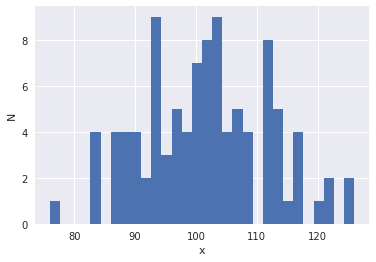

In [21]:
# import numpy as np
pd = {}
# pd is an empty disctionary
pd['pois'] = np.random.poisson(lam, size=100)
# nd now is a dictionary with one object: an array by the key 'poisson'
pl.hist(pd['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 7: poisson distribution: lam = 100, size=100

In [22]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(pd['pois'].mean(), pd['pois'].std()))

Poisson mean: 101.34, standard deviation: 10.25


In [23]:
mysize2 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize2, mysize2.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


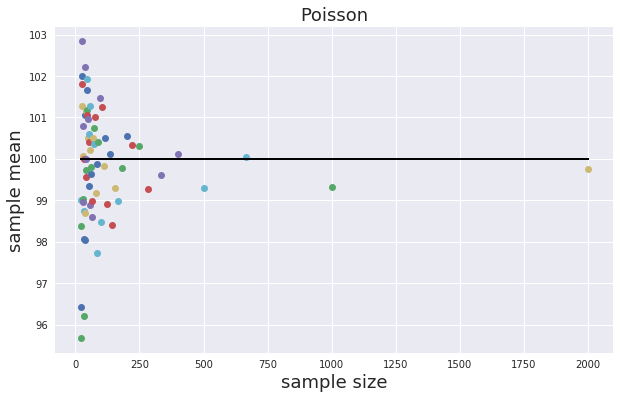

In [24]:
pd['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize2:
    pd['pois'][n] = np.random.poisson(lam,size = n)
    
# save the means for plotting later    

pd['pois']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in pd['pois']:
    if not type(nn) == str:
        pd['pois']['means'][nn] = pd['pois'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, pd['pois']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 8: Points are scattered at first. With the incresement of sample size, the point tend to converge towards the centeral line.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


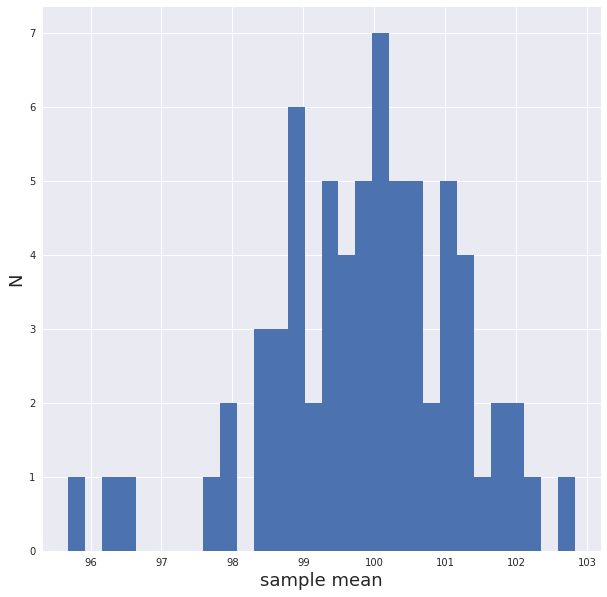

In [60]:
pallmeans = list(pd['pois']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(pallmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 9: Mean of all samples

# Do it for the Binomial distribution

In [26]:
distributions = ['binomial']

In [27]:
# assuming x is 200
x= 200

In [28]:
p = 0.5
m = x*p

(array([  1.,   7.,  11.,  12.,  24.,  20.,  14.,   8.,   2.,   1.]),
 array([  82. ,   85.7,   89.4,   93.1,   96.8,  100.5,  104.2,  107.9,
         111.6,  115.3,  119. ]),
 <a list of 10 Patch objects>)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


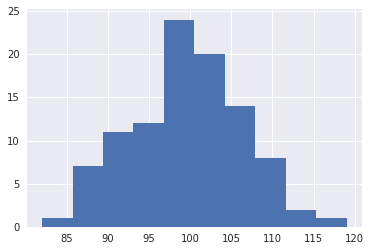

In [29]:
import numpy as np
import pylab as pl
bd = {}
bd['binomial'] = np.random.binomial(x, p,size=100)
pl.hist(bd['binomial'])

Figure10. Binomial Distribution 

In [30]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(bd['binomial'].mean(), bd['binomial'].std()))

Binomial mean: 99.47, standard deviation: 6.71


In [31]:
mysize3 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize3, mysize3.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


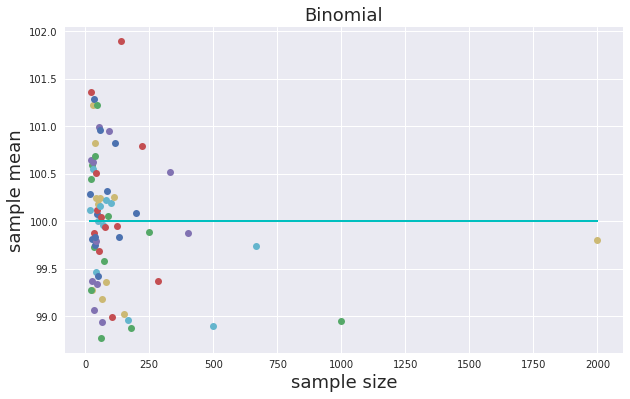

In [32]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

bd['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize3:
    bd['binomial'][n] = np.random.binomial(x, p,size=100)
    
# save the means for plotting later    

bd['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in bd['binomial']:
    if not type(nn) == str:
        bd['binomial']['means'][nn] = bd['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, bd['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize3), max(mysize3)], [m, m], 'c')

Figure11. Points are scattered at first. With the incresement of sample size, the point tend to converge towards the centeral line.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


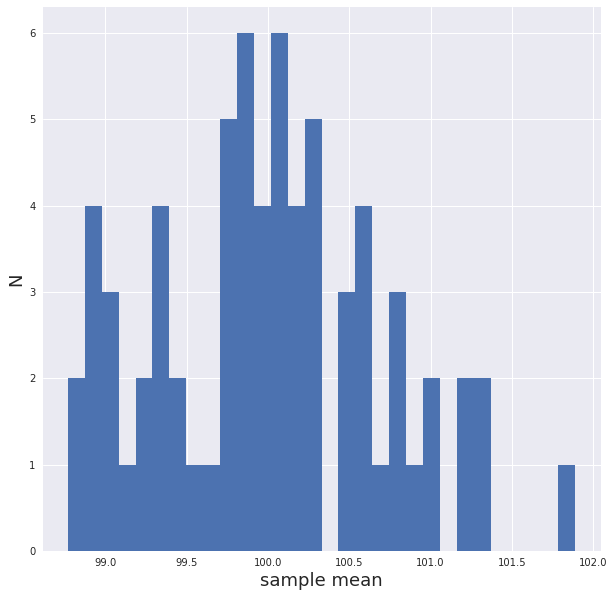

In [61]:
ballmeans = list(bd['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(ballmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure12. Mean of all samples

# Do it for the logistic distribution

In [33]:
distributions = ['logistic']

In [69]:
loc = 100

In [70]:
scale = 1

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


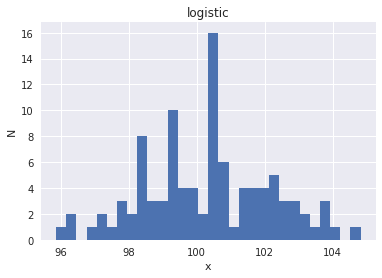

In [71]:
import numpy as np
ld = {}
# ld is an empty disctionary
ld['logistic'] = np.random.logistic(loc,scale, size=100)
# ld now is a dictionary with one object: an array by the key 'logistic'
pl.hist(ld['logistic'], bins = 30)
pl.title('logistic')
pl.ylabel('N')
pl.xlabel('x')


In [72]:
print ("Logistic mean: %.2f, standard deviation: %.2f"%(ld['logistic'].mean(), ld['logistic'].std()))

Logistic mean: 100.30, standard deviation: 1.88


In [73]:
mysize4 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize4, mysize4.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


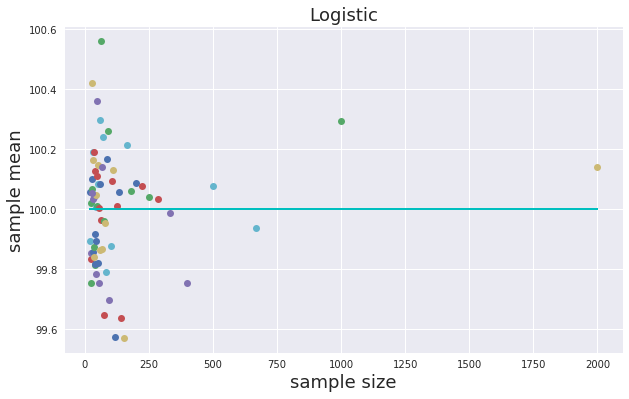

In [74]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

ld['logistic'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize4:
    ld['logistic'][n] = np.random.logistic(loc,scale, size=100)
# save the means for plotting later    

ld['logistic']['means'] = {}
axlogistic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in ld['logistic']:
    if not type(nn) == str:
        ld['logistic']['means'][nn] = ld['logistic'][nn].mean()
        #and plot it
        axlogistic_mu_n.plot(nn, ld['logistic']['means'][nn], 'o')
        axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
        axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogistic_mu_n.set_title('Logistic', fontsize=18)
        axlogistic_mu_n.plot([min(mysize4), max(mysize4)], [loc, loc], 'c')

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


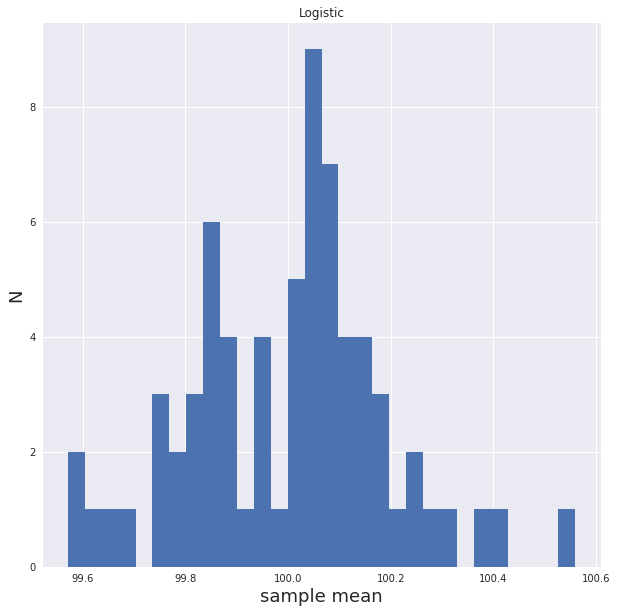

In [75]:
allmeans = list(ld['logistic']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Logistic')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


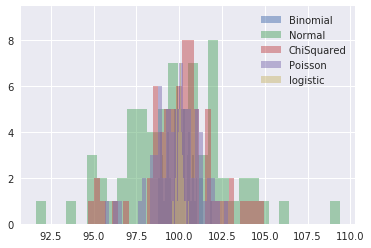

In [76]:
pl.hist(bd['binomial']['means'].values(),bins=30, alpha=0.5, label = 'Binomial')
pl.hist(nd['lnorm']['means'].values(),bins=30, alpha=0.5, label = 'Normal')
pl.hist(md['chisq']['means'].values(),bins=30, alpha=0.5, label = 'ChiSquared')
pl.hist(pd['pois']['means'].values(),bins=30, alpha=0.5, label ='Poisson')
pl.hist(ld['logistic']['means'].values(),bins=30, alpha=0.5, label = 'logistic')
pyplot.legend(loc= 'upper right')